In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_scraped = pd.read_csv('./Seattle/scraped.csv')
pd.set_option('display.max_columns', None)  
seattle_scraped.head()

id                        listing_url       scrape_id last_scraped  \
0  2318  https://www.airbnb.com/rooms/2318  20190922030624   2019-09-22   
1  5682  https://www.airbnb.com/rooms/5682  20190922030624   2019-09-22   
2  6606  https://www.airbnb.com/rooms/6606  20190922030624   2019-09-22   
3  9419  https://www.airbnb.com/rooms/9419  20190922030624   2019-09-22   
4  9460  https://www.airbnb.com/rooms/9460  20190922030624   2019-09-22   

                                                name  \
0  Casa Madrona - Urban Oasis 1 block from the park!   
1                Cozy Studio, min. to downtown -WiFi   
2                Fab, private seattle urban cottage!   
3                Glorious sun room w/ memory foambed   
4     Downtown Convention Center B&B -- Free Minibar   

                                             summary  \
0  Gorgeous, architect remodeled, 1917 Dutch Colo...   
1  The Cozy Studio is a perfect launchpad for you...   
2  This tiny cottage is only 15x10, but it has ev...   
3  This beautiful double room features a magical ...   
4  Take up a glass of wine and unwind on one of t...   

                                               space  \
0  Casa Madrona is a gorgeous, architect remodele...   
1  Hello fellow travelers, Save some money and ha...   
2  Soo centrally located, this is a little house ...   
3  Our new Sunny space has a private room from th...   
4  Greetings from Seattle. Thanks for considering...   

                                         description experiences_offered  \
0  Gorgeous, architect remodeled, 1917 Dutch Colo...                none   
1  The Cozy Studio is a perfect launchpad for you...                none   
2  This tiny cottage is only 15x10, but it has ev...                none   
3  This beautiful double room features a magical ...                none   
4  Take up a glass of wine and unwind on one of t...                none   

                               neighborhood_overview  \
0  Madrona is a hidden gem of a neighborhood. It ...   
1                                                NaN   
2  A peaceful yet highly accessible neighborhood,...   
3  Lots of restaurants (see our guide book) bars,...   
4  The apartment is situated at the intersection ...   

                                               notes  \
0  We adhere to a 10pm -9am quiet hour schedule, ...   
1  My personal favorite places to dine are:  • Ma...   
2  Check in is at three, if you'd like a snack or...   
3  This area is an arts district,you will see all...   
4  Free Zone 21 Parking.  There are 60 blocks in ...   

                                             transit  \
0                                                NaN   
1  Bus 120 is right outside and goes into downtow...   
2                                                NaN   
3  Car 2 go is in this neigborhood Bus is across ...   
4  On a map it looks like the building is right n...   

                                              access  \
0           Guests can access any part of the house.   
1  PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...   
2                                                NaN   
3  24 /7 access kitchen, bathroom and community s...   
4  In the email I send you before your arrival, i...   

                                         interaction  \
0  We are a family who live next door and are ava...   
1  I'm more than happy to meet with guests, but u...   
2  I often escape to kingston and my place on the...   
3  I have a hands on warm approach to guests but ...   
4  I give my guests space, but am available whene...   

                                         house_rules  thumbnail_url  \
0                                                NaN            NaN   
1  **PLEASE READ** NO SMOKING NO VAPING NO MARIJU...            NaN   
2  Please treat the cottage as if it were your ow...            NaN   
3  No drugs,no smoking inside *outside in front o...            NaN   
4  Dear Prospective Guest,   There aren’t real

In [2]:
seattle_listings = pd.read_csv('./Seattle/listings.csv')
seattle_listings.head()

id                                               name  host_id  \
0  2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
1  5682                Cozy Studio, min. to downtown -WiFi     8993   
2  6606                Fab, private seattle urban cottage!    14942   
3  9419                Glorious sun room w/ memory foambed    30559   
4  9460     Downtown Convention Center B&B -- Free Minibar    30832   

   host_name  neighbourhood_group   neighbourhood  latitude  longitude  \
0      Megan         Central Area         Madrona  47.61082 -122.29082   
1      Maddy             Delridge  South Delridge  47.52398 -122.35989   
2      Joyce  Other neighborhoods     Wallingford  47.65411 -122.33761   
3  Angielena  Other neighborhoods      Georgetown  47.55062 -122.32014   
4      Siena             Downtown      First Hill  47.61265 -122.32936   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    296              30                 28  2019-08-30   
1  Entire home/apt     48               3                462  2018-11-24   
2  Entire home/apt     90               2                147  2019-09-07   
3     Private room     62               2                144  2019-09-02   
4     Private room     99               3                443  2019-09-02   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               2                84  
1               3.99                               1                 0  
2               1.19                               3                85  
3               1.29                               8               365  
4               3.62                               4               150

In [19]:
seattle_listings_all = pd.merge(left=seattle_listings,right=seattle_scraped, left_on='id', right_on='id')

In [20]:
list(seattle_listings_all.columns)

['id',
 'name_x',
 'host_id_x',
 'host_name_x',
 'neighbourhood_group',
 'neighbourhood_x',
 'latitude_x',
 'longitude_x',
 'room_type_x',
 'price_x',
 'minimum_nights_x',
 'number_of_reviews_x',
 'last_review_x',
 'reviews_per_month_x',
 'calculated_host_listings_count_x',
 'availability_365_x',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name_y',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id_y',
 'host_url',
 'host_name_y',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_y',
 'neighbourh

In [21]:
col = "neighbourhood_group_cleansed"
seattle_with_dummy = pd.concat([seattle_with_dummy.drop(col, axis=1), pd.get_dummies(seattle_with_dummy[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [22]:
col = "cancellation_policy"
seattle_with_dummy = pd.concat([seattle_with_dummy.drop(col, axis=1), pd.get_dummies(seattle_with_dummy[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [23]:
col = "room_type_x"
seattle_with_dummy = pd.concat([seattle_with_dummy.drop(col, axis=1), pd.get_dummies(seattle_with_dummy[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [24]:
col = "requires_license"
seattle_with_dummy = pd.concat([seattle_with_dummy.drop(col, axis=1), pd.get_dummies(seattle_with_dummy[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [25]:
col = "property_type"
seattle_with_dummy = pd.concat([seattle_with_dummy.drop(col, axis=1), pd.get_dummies(seattle_with_dummy[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [27]:
list(seattle_with_dummy.columns)

['id',
 'name_x',
 'host_id_x',
 'host_name_x',
 'neighbourhood_group',
 'neighbourhood_x',
 'latitude_x',
 'longitude_x',
 'price_x',
 'minimum_nights_x',
 'number_of_reviews_x',
 'last_review_x',
 'reviews_per_month_x',
 'calculated_host_listings_count_x',
 'availability_365_x',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name_y',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id_y',
 'host_url',
 'host_name_y',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_y',
 'neighbourhood_cleansed',
 

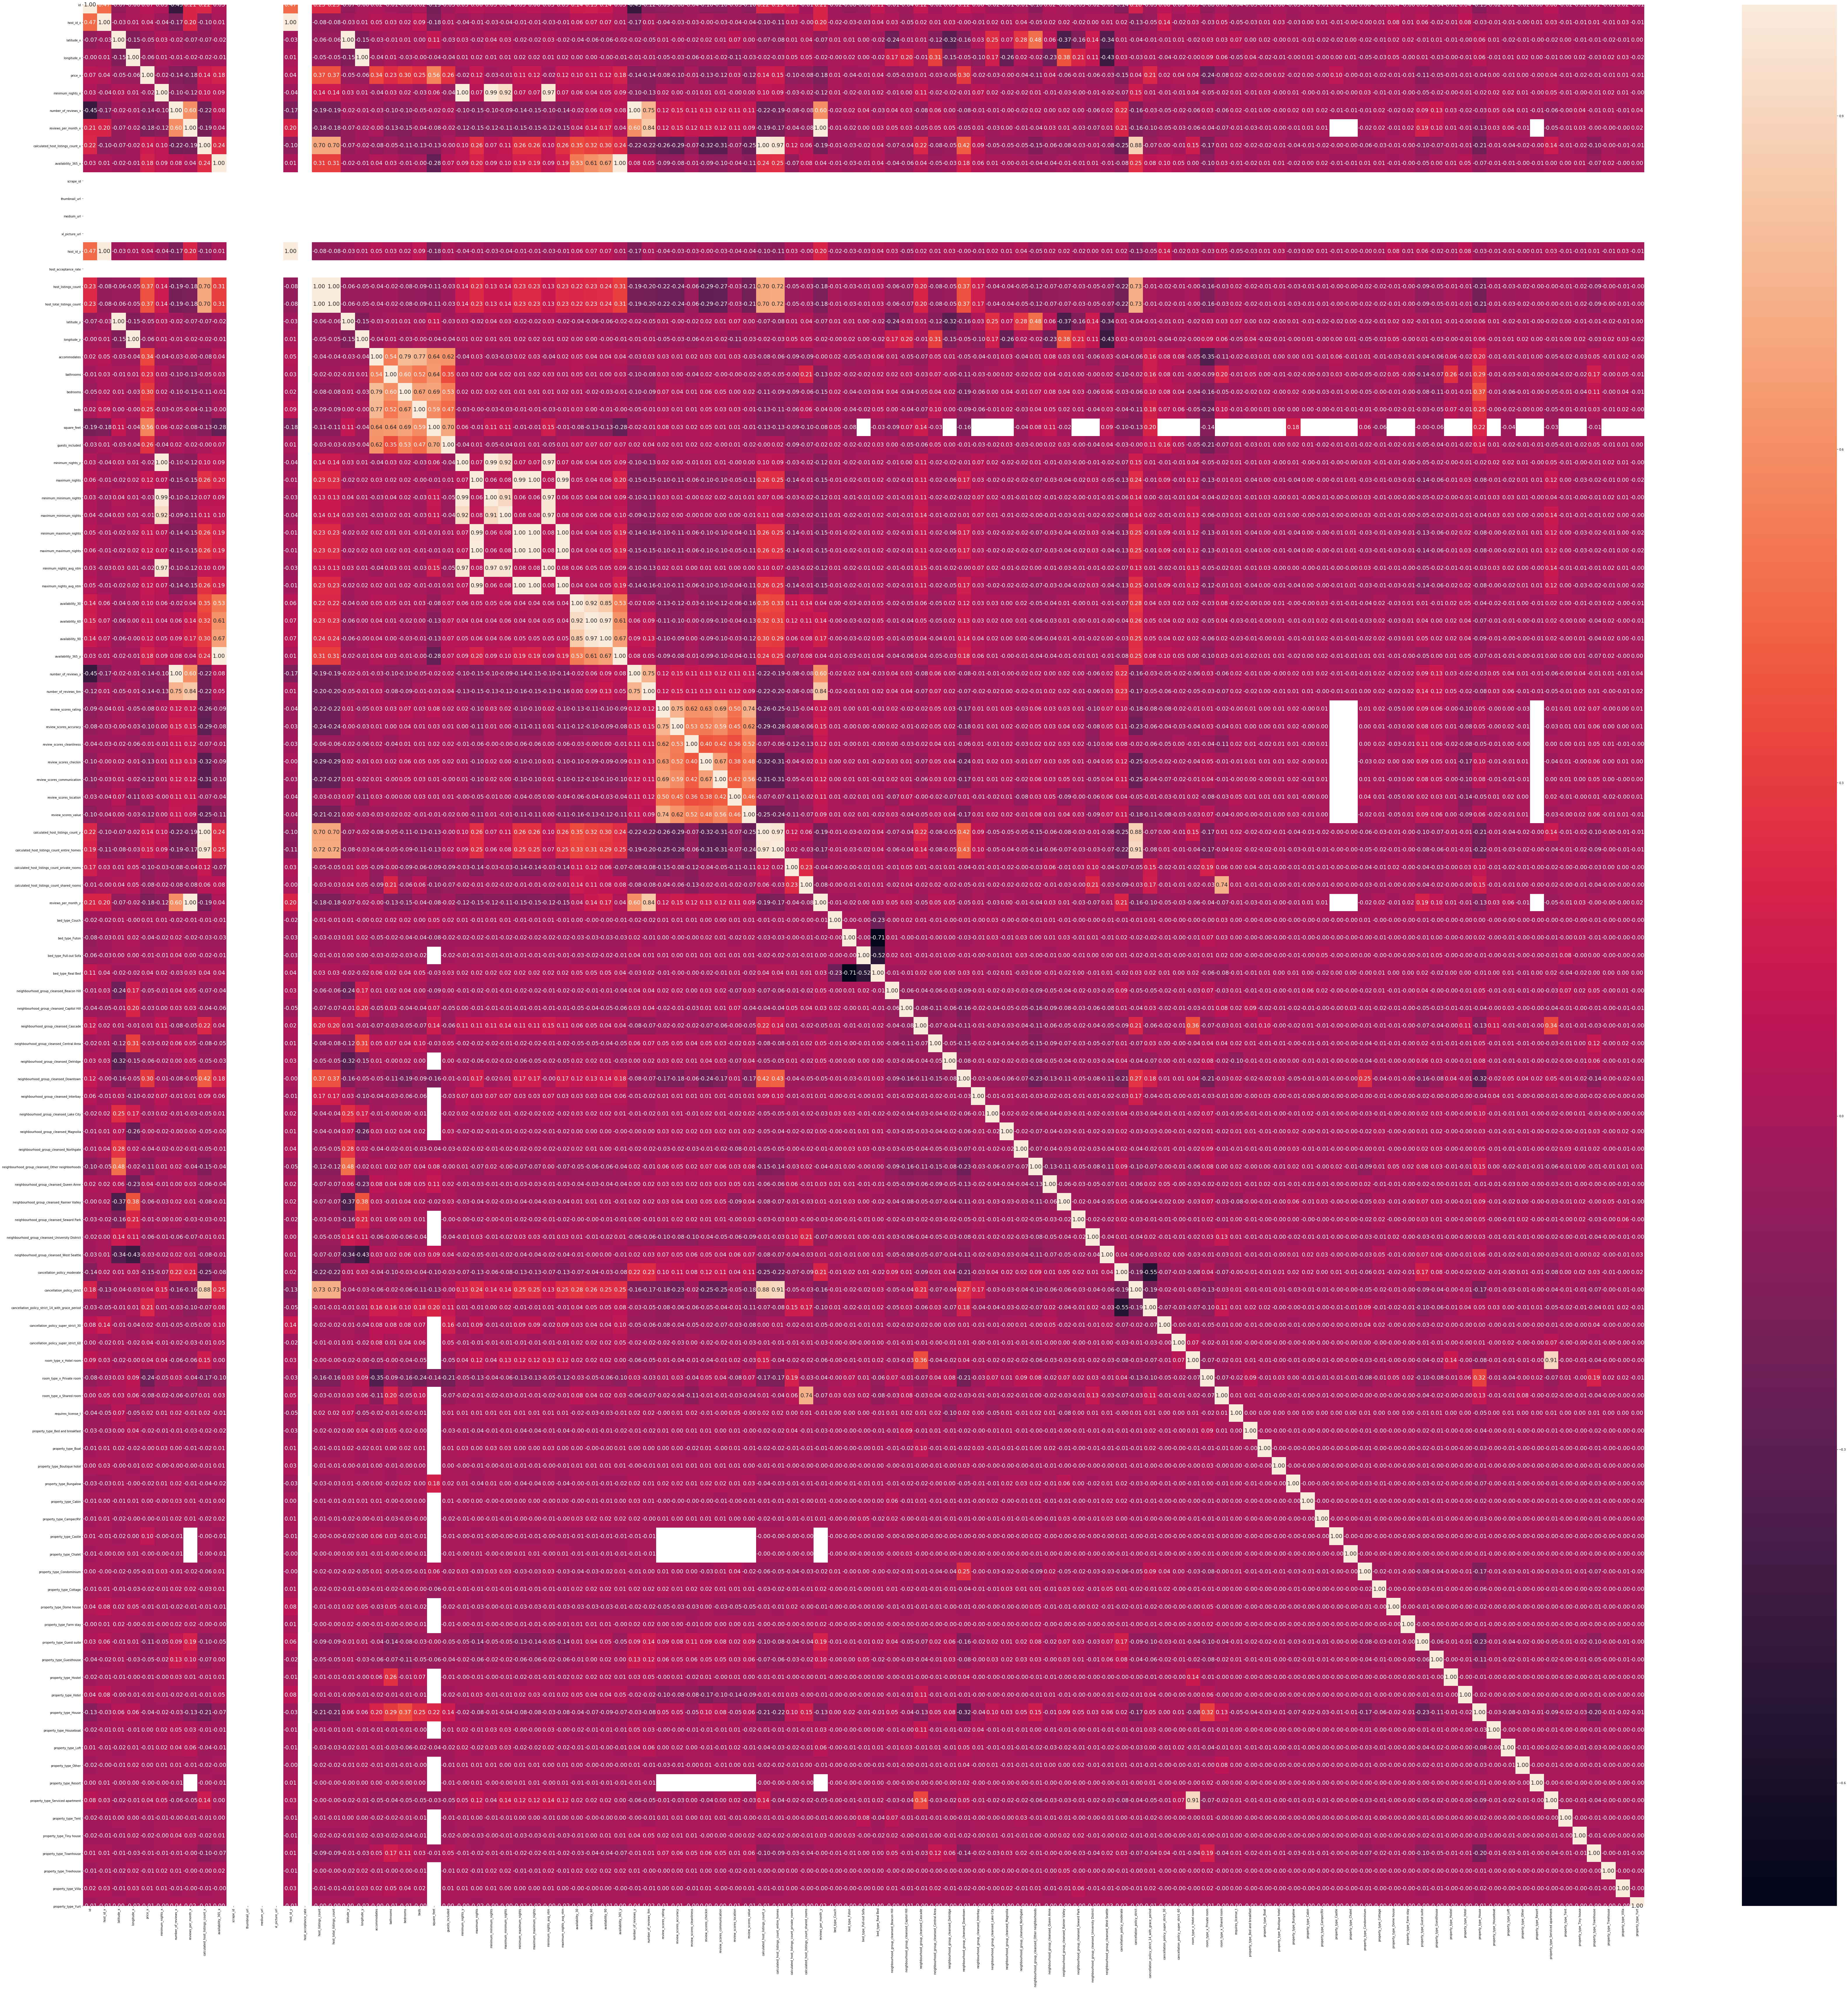

In [30]:
plt.figure(figsize=(120,120))
sns.heatmap(seattle_with_dummy.corr(), annot=True, fmt=".2f", annot_kws={"size": 19});